# Introduction

Do higher film budgets lead to more box office revenue? Let's find out if there's a relationship using the movie budgets and financial performance data that I've scraped from [the-numbers.com](https://www.the-numbers.com/movie/budgets) on **May 1st, 2018**. 

<img src=https://i.imgur.com/kq7hrEh.png>

# Import Statements

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


# Notebook Presentation

In [2]:
pd.options.display.float_format = '{:,.2f}'.format

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Read the Data

In [3]:
data = pd.read_csv('cost_revenue_dirty.csv')

# Explore and Clean the Data

**Challenge**: Answer these questions about the dataset:
1. How many rows and columns does the dataset contain?
2. Are there any NaN values present?
3. Are there any duplicate rows?
4. What are the data types of the columns?

In [4]:
data.shape

(5391, 6)

In [5]:
data.isna().sum()

Rank                     0
Release_Date             0
Movie_Title              0
USD_Production_Budget    0
USD_Worldwide_Gross      0
USD_Domestic_Gross       0
dtype: int64

In [6]:
data.isna().values.any()

False

In [7]:
data.duplicated().sum()

0

In [8]:
data.duplicated().values.any()

False

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5391 entries, 0 to 5390
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Rank                   5391 non-null   int64 
 1   Release_Date           5391 non-null   object
 2   Movie_Title            5391 non-null   object
 3   USD_Production_Budget  5391 non-null   object
 4   USD_Worldwide_Gross    5391 non-null   object
 5   USD_Domestic_Gross     5391 non-null   object
dtypes: int64(1), object(5)
memory usage: 252.8+ KB


### Data Type Conversions

**Challenge**: Convert the `USD_Production_Budget`, `USD_Worldwide_Gross`, and `USD_Domestic_Gross` columns to a numeric format by removing `$` signs and `,`. 
<br>
<br>
Note that *domestic* in this context refers to the United States.

In [10]:
data.sample()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
385,2596,6/29/1984,Conan the Destroyer,"$18,000,000","$26,400,000","$26,400,000"


In [11]:
data["USD_Production_Budget"] = data["USD_Production_Budget"].str.replace("$", "")
data["USD_Production_Budget"] = data["USD_Production_Budget"].str.replace(",", "")

data["USD_Worldwide_Gross"] = data["USD_Worldwide_Gross"].str.replace("$", "")
data["USD_Worldwide_Gross"] = data["USD_Worldwide_Gross"].str.replace(",", "")

data["USD_Domestic_Gross"] = data["USD_Domestic_Gross"].str.replace("$", "")
data["USD_Domestic_Gross"] = data["USD_Domestic_Gross"].str.replace(",", "")

In [12]:
# chars_to_remove = [',', '$']
# columns_to_clean = ['USD_Production_Budget', 
#                     'USD_Worldwide_Gross',
#                     'USD_Domestic_Gross']
 
# for col in columns_to_clean:
#     for char in chars_to_remove:
#         # Replace each character with an empty string
#         data[col] = data[col].astype(str).str.replace(char, "")
#     # Convert column to a numeric data type
#     data[col] = pd.to_numeric(data[col])

In [13]:
data.head()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
0,5293,8/2/1915,The Birth of a Nation,110000,11000000,10000000
1,5140,5/9/1916,Intolerance,385907,0,0
2,5230,12/24/1916,"20,000 Leagues Under the Sea",200000,8000000,8000000
3,5299,9/17/1920,Over the Hill to the Poorhouse,100000,3000000,3000000
4,5222,1/1/1925,The Big Parade,245000,22000000,11000000


**Challenge**: Convert the `Release_Date` column to a Pandas Datetime type. 

In [14]:
data["Release_Date"] = pd.to_datetime(data["Release_Date"])

In [15]:
data["Release_Date"].info

<bound method Series.info of 0      1915-08-02
1      1916-05-09
2      1916-12-24
3      1920-09-17
4      1925-01-01
          ...    
5386   2018-10-08
5387   2018-12-18
5388   2020-12-31
5389   2020-12-31
5390   2020-12-31
Name: Release_Date, Length: 5391, dtype: datetime64[ns]>

### Descriptive Statistics

**Challenge**: 

1. What is the average production budget of the films in the data set?
2. What is the average worldwide gross revenue of films?
3. What were the minimums for worldwide and domestic revenue?
4. Are the bottom 25% of films actually profitable or do they lose money?
5. What are the highest production budget and highest worldwide gross revenue of any film?
6. How much revenue did the lowest and highest budget films make?

In [16]:
data.describe()

,Rank,Release_Date
count,"5,391.00",5391
mean,"2,696.00",2003-09-19 15:02:02.203672704
min,1.00,1915-08-02 00:00:00
25%,"1,348.50",1999-12-02 12:00:00
50%,"2,696.00",2006-06-23 00:00:00
75%,"4,043.50",2011-11-23 00:00:00
max,"5,391.00",2020-12-31 00:00:00
std,"1,556.39",NaN


In [17]:
data.columns

Index(['Rank', 'Release_Date', 'Movie_Title', 'USD_Production_Budget',
       'USD_Worldwide_Gross', 'USD_Domestic_Gross'],
      dtype='object')

In [18]:
np.array((data["USD_Production_Budget"]))

array(['110000', '385907', '200000', ..., '175000000', '50000000',
       '20000000'], dtype=object)

What is the average production budget of the films in the data set?



In [19]:
np.mean(np.array(data["USD_Production_Budget"]).astype(int))

31113737.57837136

What is the average worldwide gross revenue of films?

In [20]:
data["USD_Worldwide_Gross"] = pd.to_numeric(data["USD_Worldwide_Gross"], errors="coerce")

print(data["USD_Worldwide_Gross"].mean())


88855421.96271564


What were the minimums for worldwide and domestic revenue?

In [21]:
np.min(np.array(data["USD_Worldwide_Gross"]).astype(int))

-2087351628

In [22]:
np.min(np.array(data["USD_Domestic_Gross"]).astype(int))

0

In [23]:
data["USD_Production_Budget"] = (data["USD_Production_Budget"]).astype(int)
data["USD_Worldwide_Gross"] = (data["USD_Worldwide_Gross"]).astype(int)
data["USD_Domestic_Gross"] = (data["USD_Domestic_Gross"]).astype(int)

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5391 entries, 0 to 5390
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Rank                   5391 non-null   int64         
 1   Release_Date           5391 non-null   datetime64[ns]
 2   Movie_Title            5391 non-null   object        
 3   USD_Production_Budget  5391 non-null   int32         
 4   USD_Worldwide_Gross    5391 non-null   int32         
 5   USD_Domestic_Gross     5391 non-null   int32         
dtypes: datetime64[ns](1), int32(3), int64(1), object(1)
memory usage: 189.7+ KB


Are the bottom 25% of films actually profitable or do they lose money?

In [24]:
data["Revenue"] =  data["USD_Worldwide_Gross"] - data["USD_Production_Budget"]
print(data.sample())

      Rank Release_Date        Movie_Title  USD_Production_Budget  \
2871  4059   2007-03-08  Gandhi, My Father                5000000   

      USD_Worldwide_Gross  USD_Domestic_Gross  Revenue  
2871              1375194              240425 -3624806  


In [25]:
data.sort_values(by="Rank", ascending=False)[:int(0.25*len(data))]

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Revenue
2427,5391,2005-05-08,My Date With Drew,1100,181041,181041,179941
5007,5390,2015-09-29,A Plague So Pleasant,1400,0,0,-1400
5006,5389,2015-09-29,Signed Sealed Delivered,5000,0,0,-5000
2462,5388,2005-07-13,Return to the Land of Wonders,5000,1338,1338,-3662
1209,5387,1999-02-04,Following,6000,240495,48482,234495
...,...,...,...,...,...,...,...
635,4049,1992-04-24,A Midnight Clear,5000000,1526697,1526697,-3473303
1052,4048,1998-01-30,Zero Effect,5000000,2080693,2080693,-2919307
5040,4047,2015-10-23,Jem and the Holograms,5000000,2368937,2184640,-2631063
3799,4046,2010-12-17,Rabbit Hole,5000000,6205034,2229058,1205034


What are the highest production budget and highest worldwide gross revenue of any film?

In [26]:
data["USD_Production_Budget"].idxmax()

3529

In [27]:
print(data.iloc[data["USD_Production_Budget"].idxmax()])

Rank                                       1
Release_Date             2009-12-18 00:00:00
Movie_Title                           Avatar
USD_Production_Budget              425000000
USD_Worldwide_Gross              -1511048314
USD_Domestic_Gross                 760507625
Revenue                          -1936048314
Name: 3529, dtype: object


In [28]:
print(data.iloc[data["USD_Worldwide_Gross"].idxmax()])

Rank                                                        2
Release_Date                              2015-12-18 00:00:00
Movie_Title              Star Wars Ep. VII: The Force Awakens
USD_Production_Budget                               306000000
USD_Worldwide_Gross                                2058662225
USD_Domestic_Gross                                  936662225
Revenue                                            1752662225
Name: 5079, dtype: object


How much revenue did the lowest and highest budget films make?

In [29]:
print(data["Revenue"].iloc[data["USD_Production_Budget"].idxmax()])

-1936048314


In [30]:
print(data["Revenue"].iloc[data["USD_Production_Budget"].idxmin()])

179941


# Investigating the Zero Revenue Films

**Challenge** How many films grossed $0 domestically (i.e., in the United States)? What were the highest budget films that grossed nothing?

In [31]:
data[data["USD_Domestic_Gross"] == 0]

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Revenue
1,5140,1916-05-09,Intolerance,385907,0,0,-385907
6,4630,1927-12-08,Wings,2000000,0,0,-2000000
8,4240,1930-01-01,Hell's Angels,4000000,0,0,-4000000
17,4814,1936-10-20,"Charge of the Light Brigade, The",1200000,0,0,-1200000
27,4789,1941-10-28,How Green Was My Valley,1250000,0,0,-1250000
...,...,...,...,...,...,...,...
5386,2950,2018-10-08,Meg,15000000,0,0,-15000000
5387,126,2018-12-18,Aquaman,160000000,0,0,-160000000
5388,96,2020-12-31,Singularity,175000000,0,0,-175000000
5389,1119,2020-12-31,Hannibal the Conqueror,50000000,0,0,-50000000


In [32]:
len(data[data["USD_Domestic_Gross"] == 0])

512

In [33]:
data[data["USD_Domestic_Gross"] == 0].sort_values(by="USD_Production_Budget", ascending=False)

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Revenue
5388,96,2020-12-31,Singularity,175000000,0,0,-175000000
5387,126,2018-12-18,Aquaman,160000000,0,0,-160000000
5384,321,2018-09-03,A Wrinkle in Time,103000000,0,0,-103000000
5385,366,2018-10-08,Amusement Park,100000000,0,0,-100000000
5090,556,2015-12-31,"Don Gato, el inicio de la pandilla",80000000,4547660,0,-75452340
...,...,...,...,...,...,...,...
4787,5371,2014-12-31,Stories of Our Lives,15000,0,0,-15000
3056,5374,2007-12-31,Tin Can Man,12000,0,0,-12000
4907,5381,2015-05-19,Family Motocross,10000,0,0,-10000
5006,5389,2015-09-29,Signed Sealed Delivered,5000,0,0,-5000


**Challenge**: How many films grossed $0 worldwide? What are the highest budget films that had no revenue internationally?

In [34]:
len(data[data["USD_Worldwide_Gross"] == 0])

357

In [35]:
data[data["USD_Worldwide_Gross"] == 0].sort_values(by="USD_Production_Budget", ascending=False)

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Revenue
5388,96,2020-12-31,Singularity,175000000,0,0,-175000000
5387,126,2018-12-18,Aquaman,160000000,0,0,-160000000
5384,321,2018-09-03,A Wrinkle in Time,103000000,0,0,-103000000
5385,366,2018-10-08,Amusement Park,100000000,0,0,-100000000
5058,880,2015-11-12,The Ridiculous 6,60000000,0,0,-60000000
...,...,...,...,...,...,...,...
4787,5371,2014-12-31,Stories of Our Lives,15000,0,0,-15000
3056,5374,2007-12-31,Tin Can Man,12000,0,0,-12000
4907,5381,2015-05-19,Family Motocross,10000,0,0,-10000
5006,5389,2015-09-29,Signed Sealed Delivered,5000,0,0,-5000


### Filtering on Multiple Conditions

In [36]:
international_releases = data.loc[(data.USD_Domestic_Gross == 0) & 
                                  (data.USD_Worldwide_Gross != 0)]
print(f'Number of international releases: {len(international_releases)}')
international_releases.head()

Number of international releases: 155


,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Revenue
71,4310,1956-02-16,Carousel,3380000,3220,0,-3376780
1579,5087,2001-02-11,Everything Put Together,500000,7890,0,-492110
1744,3695,2001-12-31,The Hole,7500000,10834406,0,3334406
2155,4236,2003-12-31,Nothing,4000000,63180,0,-3936820
2203,2513,2004-03-31,The Touch,20000000,5918742,0,-14081258


**Challenge**: Use the [`.query()` function](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.query.html) to accomplish the same thing. Create a subset for international releases that had some worldwide gross revenue, but made zero revenue in the United States. 

Hint: This time you'll have to use the `and` keyword.

In [37]:
data.query('USD_Worldwide_Gross != 0 and USD_Domestic_Gross == 0')
print(f'Number of international releases: {len(international_releases)}')
international_releases.tail()

Number of international releases: 155


,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Revenue
5340,1506,2017-04-14,Queen of the Desert,36000000,1480089,0,-34519911
5348,2225,2017-05-05,Chāi dàn zhuānjiā,23000000,58807172,0,35807172
5360,4832,2017-07-03,Departure,1100000,27561,0,-1072439
5372,1856,2017-08-25,Ballerina,30000000,48048527,0,18048527
5374,4237,2017-08-25,Polina danser sa vie,4000000,36630,0,-3963370


### Unreleased Films

**Challenge**:
* Identify which films were not released yet as of the time of data collection (May 1st, 2018).
* How many films are included in the dataset that have not yet had a chance to be screened in the box office? 
* Create another DataFrame called data_clean that does not include these films. 

In [38]:
# Date of Data Collection
scrape_date = pd.Timestamp('2018-5-1')

In [39]:
unreleased_films = data[data["Release_Date"] >= scrape_date]

unreleased_films

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Revenue
5384,321,2018-09-03,A Wrinkle in Time,103000000,0,0,-103000000
5385,366,2018-10-08,Amusement Park,100000000,0,0,-100000000
5386,2950,2018-10-08,Meg,15000000,0,0,-15000000
5387,126,2018-12-18,Aquaman,160000000,0,0,-160000000
5388,96,2020-12-31,Singularity,175000000,0,0,-175000000
5389,1119,2020-12-31,Hannibal the Conqueror,50000000,0,0,-50000000
5390,2517,2020-12-31,"Story of Bonnie and Clyde, The",20000000,0,0,-20000000


In [40]:
print(len(unreleased_films))

7


In [41]:
data_clean = data.drop(unreleased_films.index)

### Films that Lost Money

**Challenge**: 
What is the percentage of films where the production costs exceeded the worldwide gross revenue? 

In [42]:
data_clean.describe()

,Rank,Release_Date,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Revenue
count,"5,384.00",5384,"5,384.00","5,384.00","5,384.00","5,384.00"
mean,"2,698.11",2003-09-12 00:26:12.659732480,"31,038,476.84","87,375,491.31","41,289,131.75","57,134,742.43"
min,1.00,1915-08-02 00:00:00,"1,100.00","-2,087,351,628.00",0.00,"-1,936,048,314.00"
25%,"1,351.75",1999-12-02 00:00:00,"5,000,000.00","3,900,925.25","1,354,765.25","-2,200,031.50"
50%,"2,698.50",2006-06-16 00:00:00,"17,000,000.00","27,480,637.00","17,221,932.00","8,181,640.50"
75%,"4,045.25",2011-11-18 00:00:00,"40,000,000.00","96,447,089.00","52,403,530.00","59,554,615.00"
max,"5,391.00",2017-12-31 00:00:00,"425,000,000.00","2,058,662,225.00","936,662,225.00","2,007,615,668.00"
std,"1,555.79",NaN,"40,440,041.47","166,055,696.58","66,055,507.64","140,074,480.98"


In [43]:
len(data_clean[data_clean["Revenue"] < 0])

2008

In [44]:
len(data_clean[data_clean["Revenue"] >= 0])

3376

In [45]:
len(data_clean)

5384

In [46]:
print(len(data_clean[data_clean["Revenue"] < 0]) / len(data_clean))

0.37295690936106984


In [47]:
money_losing = data_clean.loc[data_clean.USD_Production_Budget > data_clean.USD_Worldwide_Gross]
len(money_losing)/len(data_clean)

0.37314264487369986

In [48]:
money_losing = data_clean.query('USD_Production_Budget > USD_Worldwide_Gross')
money_losing.shape[0]/data_clean.shape[0]

0.37314264487369986

# Seaborn for Data Viz: Bubble Charts

In [49]:
import seaborn as sns

### Plotting Movie Releases over Time

**Challenge**: Try to create the following Bubble Chart:

<img src=https://i.imgur.com/8fUn9T6.png>



c:\Users\imamb\.conda\envs\udemy_100python\Lib\site-packages\seaborn\utils.py:675: RuntimeWarning: invalid value encountered in cast
  raw_levels = locator.tick_values(*limits).astype(dtype)


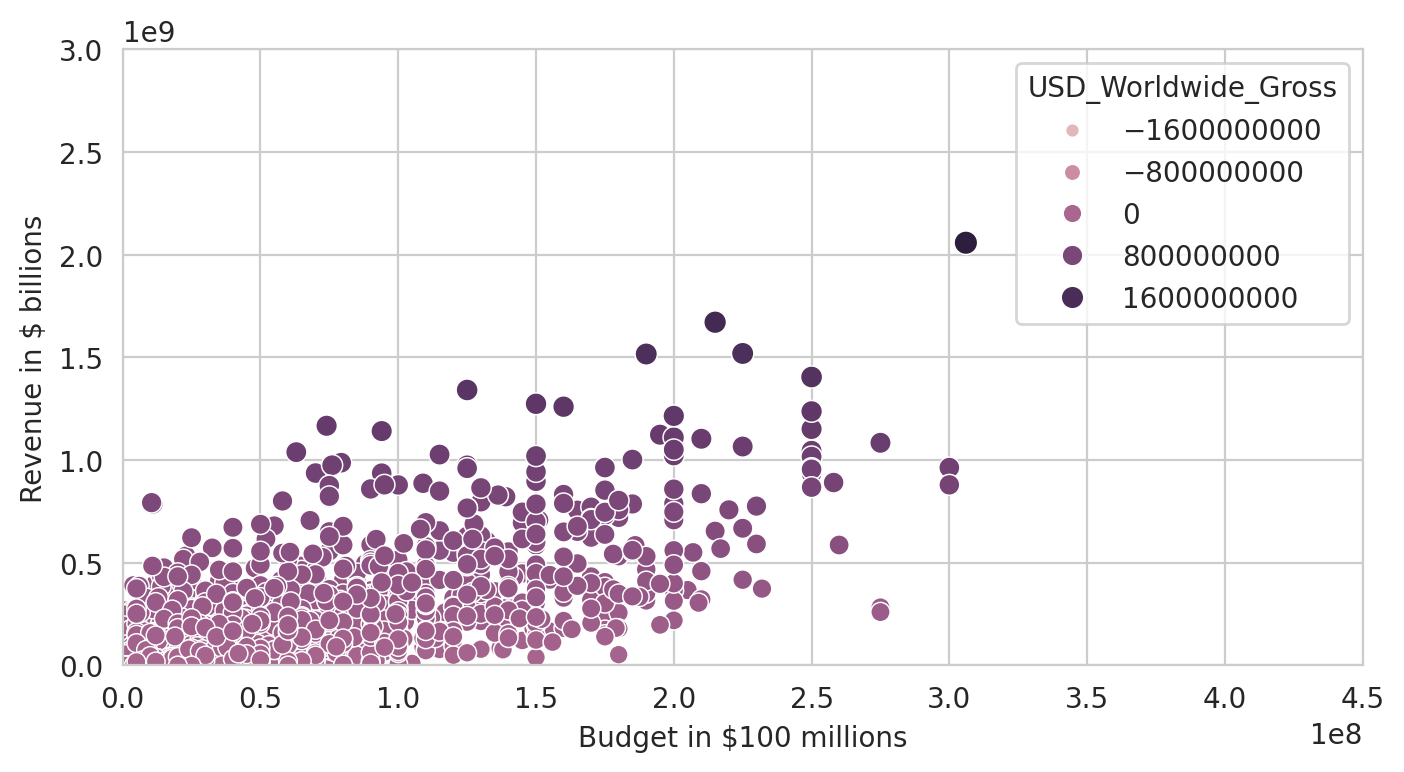

In [50]:
plt.figure(figsize=(8,4), dpi = 200)

with sns.axes_style('whitegrid'):
  ax = sns.scatterplot(data=data_clean,
                       x='USD_Production_Budget', 
                       y='USD_Worldwide_Gross',
                       hue='USD_Worldwide_Gross',
                       size='USD_Worldwide_Gross')

ax.set(ylim=(0, 3000000000),
       xlim=(0, 450000000),
       ylabel='Revenue in $ billions',
       xlabel='Budget in $100 millions')

plt.show()

In [51]:
data_clean.sample()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Revenue
1871,2111,2002-09-13,Stealing Harvard,25000000,13973532,13973532,-11026468


c:\Users\imamb\.conda\envs\udemy_100python\Lib\site-packages\seaborn\utils.py:675: RuntimeWarning: invalid value encountered in cast
  raw_levels = locator.tick_values(*limits).astype(dtype)


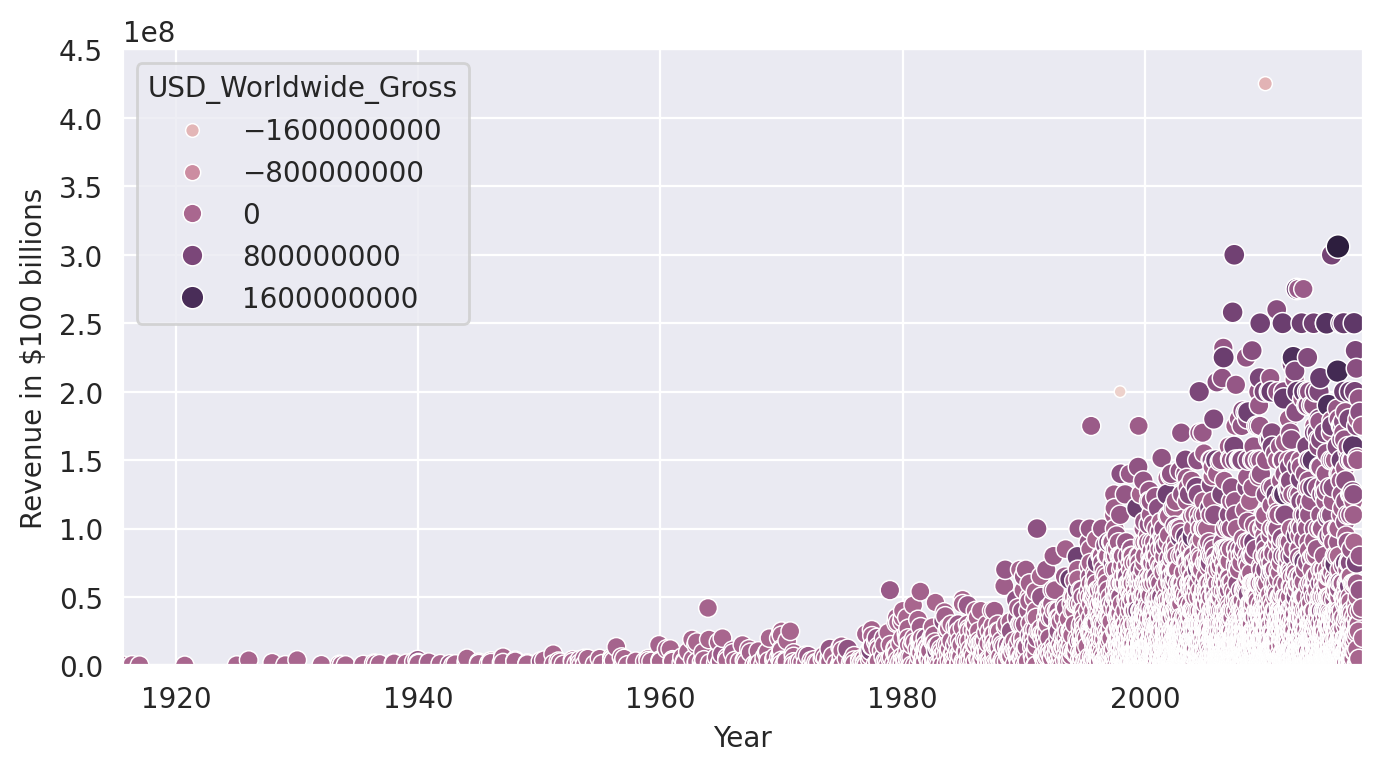

In [52]:
plt.figure(figsize=(8,4), dpi = 200)

with sns.axes_style('darkgrid'):
  ax = sns.scatterplot(data=data_clean,
                       x='Release_Date', 
                       y='USD_Production_Budget',
                       hue='USD_Worldwide_Gross',
                       size='USD_Worldwide_Gross')

ax.set(ylim=(0, 450000000),
       xlim=(data_clean.Release_Date.min(), data_clean.Release_Date.max()),
       ylabel='Revenue in $100 billions',
       xlabel='Year')

plt.show()

# Converting Years to Decades Trick

**Challenge**: Create a column in `data_clean` that has the decade of the release. 

<img src=https://i.imgur.com/0VEfagw.png width=650> 

Here's how: 
1. Create a [`DatetimeIndex` object](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DatetimeIndex.html) from the Release_Date column. 
2. Grab all the years from the `DatetimeIndex` object using the `.year` property.
<img src=https://i.imgur.com/5m06Ach.png width=650>
3. Use floor division `//` to convert the year data to the decades of the films.
4. Add the decades as a `Decade` column to the `data_clean` DataFrame.

In [53]:
(pd.DatetimeIndex(data=data_clean["Release_Date"]).year)

Index([1915, 1916, 1916, 1920, 1925, 1925, 1927, 1929, 1930, 1931,
       ...
       2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017],
      dtype='int32', name='Release_Date', length=5384)

In [54]:
decades = []

for year in pd.DatetimeIndex(data=data_clean["Release_Date"]).year:
    decades.append((year // 10) * 10)

print(decades)

[1910, 1910, 1910, 1920, 1920, 1920, 1920, 1920, 1930, 1930, 1930, 1930, 1930, 1930, 1930, 1930, 1930, 1930, 1930, 1930, 1930, 1930, 1930, 1930, 1940, 1940, 1940, 1940, 1940, 1940, 1940, 1940, 1940, 1940, 1940, 1940, 1940, 1940, 1940, 1940, 1940, 1940, 1940, 1940, 1940, 1940, 1950, 1950, 1950, 1950, 1950, 1950, 1950, 1950, 1950, 1950, 1950, 1950, 1950, 1950, 1950, 1950, 1950, 1950, 1950, 1950, 1950, 1950, 1950, 1950, 1950, 1950, 1950, 1950, 1950, 1950, 1950, 1950, 1950, 1950, 1950, 1950, 1950, 1950, 1950, 1960, 1960, 1960, 1960, 1960, 1960, 1960, 1960, 1960, 1960, 1960, 1960, 1960, 1960, 1960, 1960, 1960, 1960, 1960, 1960, 1960, 1960, 1960, 1960, 1960, 1960, 1960, 1960, 1960, 1960, 1960, 1960, 1960, 1960, 1960, 1960, 1960, 1960, 1960, 1960, 1960, 1960, 1960, 1960, 1960, 1960, 1960, 1960, 1960, 1960, 1960, 1960, 1960, 1960, 1960, 1960, 1960, 1960, 1960, 1960, 1960, 1960, 1960, 1960, 1960, 1960, 1960, 1960, 1970, 1970, 1970, 1970, 1970, 1970, 1970, 1970, 1970, 1970, 1970, 1970, 1970, 197

In [55]:
data_clean["Decade"] = decades
data_clean.sample()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Revenue,Decade
3561,4402,2010-01-10,Chain Letter,3000000,1022453,205842,-1977547,2010


### Separate the "old" (before 1969) and "New" (1970s onwards) Films

**Challenge**: Create two new DataFrames: `old_films` and `new_films`
* `old_films` should include all the films before 1969 (up to and including 1969)
* `new_films` should include all the films from 1970 onwards
* How many films were released prior to 1970?
* What was the most expensive film made prior to 1970?

In [56]:
old_films = data_clean[data_clean["Decade"] < 1970]
new_films = data_clean[data_clean["Decade"] >= 1970]

print(f"Number of films released prior to 1970: {len(old_films)}")

Number of films released prior to 1970: 153


In [57]:
old_films.iloc[old_films["USD_Production_Budget"].idxmax()]

Rank                                    1253
Release_Date             1963-12-06 00:00:00
Movie_Title                        Cleopatra
USD_Production_Budget               42000000
USD_Worldwide_Gross                 71000000
USD_Domestic_Gross                  57000000
Revenue                             29000000
Decade                                  1960
Name: 109, dtype: object

In [58]:
print(f"The most expensive film made prior to 1970 is {old_films.iloc[old_films["USD_Production_Budget"].idxmax()].Movie_Title}")

The most expensive film made prior to 1970 is Cleopatra


# Seaborn Regression Plots

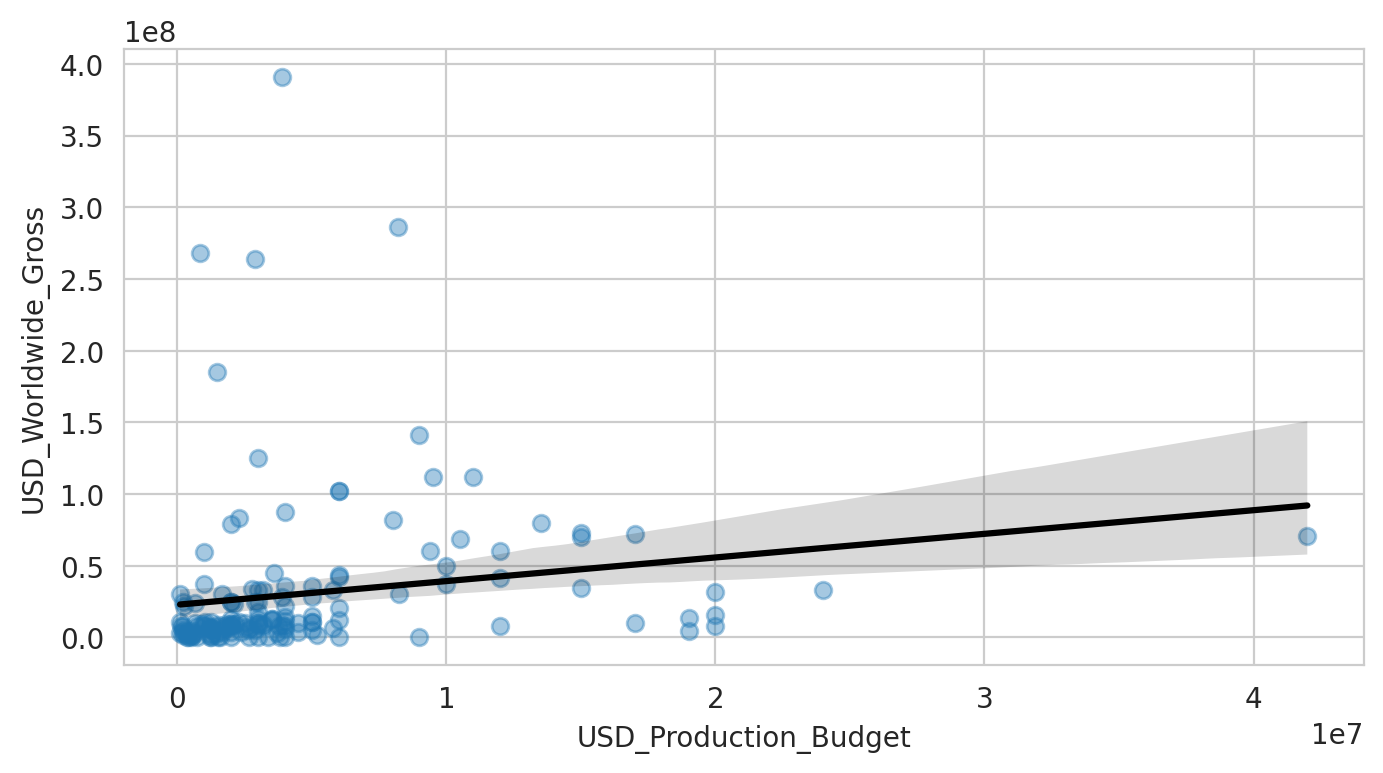

In [59]:
plt.figure(figsize=(8,4), dpi=200)
with sns.axes_style("whitegrid"):
  sns.regplot(data=old_films, 
            x='USD_Production_Budget', 
            y='USD_Worldwide_Gross',
            scatter_kws = {'alpha': 0.4},
            line_kws = {'color': 'black'})

**Challenge**: Use Seaborn's `.regplot()` to show the scatter plot and linear regression line against the `new_films`. 
<br>
<br>
Style the chart

* Put the chart on a `'darkgrid'`.
* Set limits on the axes so that they don't show negative values.
* Label the axes on the plot "Revenue in \$ billions" and "Budget in \$ millions".
* Provide HEX colour codes for the plot and the regression line. Make the dots dark blue (#2f4b7c) and the line orange (#ff7c43).

Interpret the chart

* Do our data points for the new films align better or worse with the linear regression than for our older films?
* Roughly how much would a film with a budget of $150 million make according to the regression line?

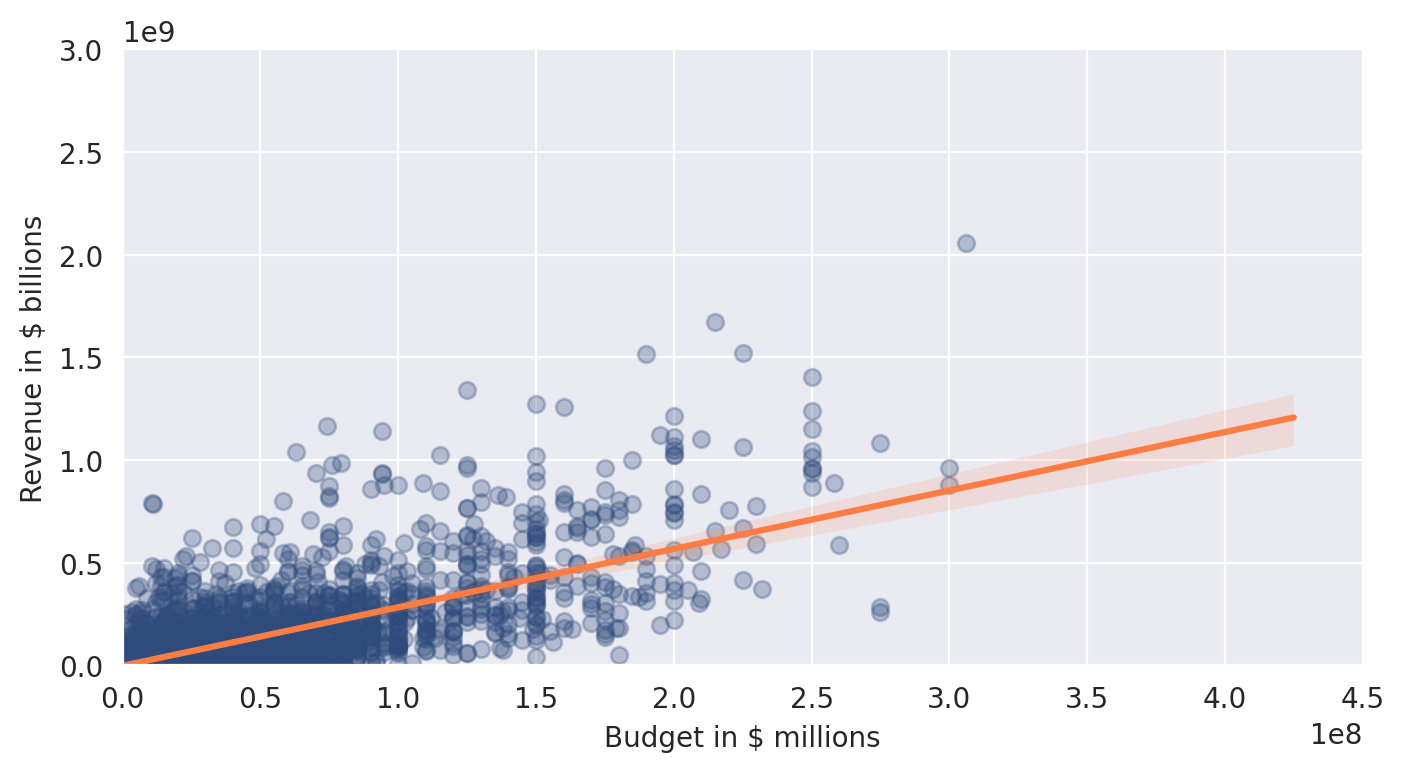

In [69]:
plt.figure(figsize=(8,4), dpi=200)
with sns.axes_style("darkgrid"):
  ax = sns.regplot(data=new_films, 
            x='USD_Production_Budget', 
            y='USD_Worldwide_Gross',
            color = "#2f4b7c",
            scatter_kws = {'alpha': 0.3},
            line_kws = {'color': '#ff7c43'})
  # )(new_films.USD_Worldwide_Gross.min(), new_films.USD_Worldwide_Gross.max())
  # (new_films.USD_Production_Budget.min(), new_films.USD_Production_Budget.max()),
  ax.set(ylim=(0, 3000000000),
        xlim=(0, 450000000),
        ylabel='Revenue in $ billions',
        xlabel='Budget in $ millions')

# Run Your Own Regression with scikit-learn

$$ REV \hat ENUE = \theta _0 + \theta _1 BUDGET$$

In [71]:
from sklearn.linear_model import LinearRegression

In [72]:
regression = LinearRegression()

In [73]:
# Explanatory Variable(s) or Feature(s)
X = pd.DataFrame(new_films, columns=['USD_Production_Budget'])
 
# Response Variable or Target
y = pd.DataFrame(new_films, columns=['USD_Worldwide_Gross']) 

In [75]:
# Find the best-fit line
regression.fit(X, y)

LinearRegression()

In [76]:
# theta zero
regression.intercept_

array([-1464975.2732534])

In [77]:
# theta one
regression.coef_

array([[2.84508838]])

In [78]:
# R-squared
regression.score(X, y)

0.4769197566336725

**Challenge**: Run a linear regression for the `old_films`. Calculate the intercept, slope and r-squared. How much of the variance in movie revenue does the linear model explain in this case?

In [79]:
# Explanatory Variable(s) or Feature(s)
X_old = pd.DataFrame(old_films, columns=['USD_Production_Budget'])
 
# Response Variable or Target
y_old = pd.DataFrame(old_films, columns=['USD_Worldwide_Gross']) 

In [80]:
# Find the best-fit line
regression.fit(X_old, y_old)

LinearRegression()

In [81]:
# theta zero
regression.intercept_

array([22821538.63508038])

In [82]:
# theta one
regression.coef_

array([[1.64771314]])

In [83]:
# R-squared
regression.score(X, y)

0.3856883264960317

# Use Your Model to Make a Prediction

We just estimated the slope and intercept! Remember that our Linear Model has the following form:

$$ REV \hat ENUE = \theta _0 + \theta _1 BUDGET$$

**Challenge**:  How much global revenue does our model estimate for a film with a budget of $350 million? 

In [85]:
# theta zero
type(regression.intercept_[0])

numpy.float64

In [94]:
g_revenue = (regression.intercept_[0]) + (regression.coef_[0]) * 350000000
print(g_revenue[0])

599521139.0388365


In [95]:
revenue_estimate = round(g_revenue[0], -6)
print(f'The estimated revenue for a $350 film is around ${revenue_estimate:.10}.')

The estimated revenue for a $350 film is around $600000000.0.
